# List of exercises - 1 (answers)

author: Lucas Tavares @lucaase

## Loading the data (remember to import the 'LFP_HG_HFO.mat' file to your workspace first)

In [ ]:
import numpy as np
from scipy.io import loadmat
from scipy.signal import welch
import matplotlib.pyplot as plt

mat = loadmat('LFP_HG_HFO.mat')

lfpHG = np.array(mat['lfpHG'])
lfpHFO = np.array(mat['lfpHFO'])

## Questions

In [ ]:
srate = 1000. # Question 1
dt = 1./srate # Question 2
tmax = np.size(lfpHFO)/srate  # Question 3
t = np.arange(0,tmax,dt) # Question 4

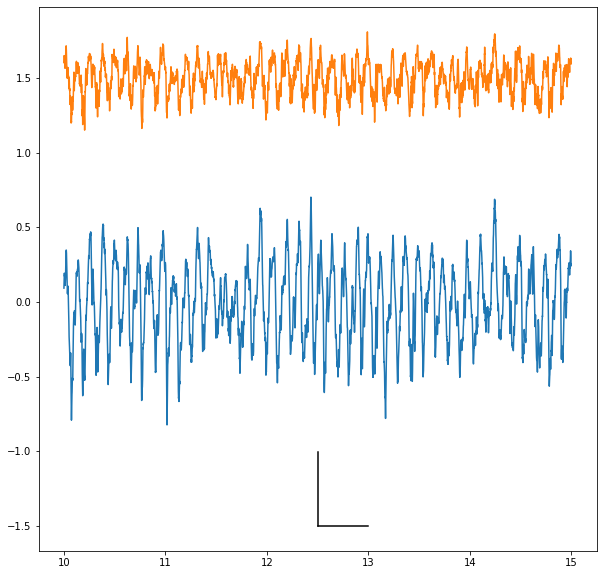

In [66]:
# Question 5
condition = [(t>=10) & (t<=15)]

plt.figure(figsize=(10,10))
plt.plot(t[tuple(condition)],lfpHG[np.where(condition)])
plt.plot(t[tuple(condition)],1.5+lfpHFO[np.where(condition)])
# Question 6
plt.plot(np.repeat(12.5,500), np.arange(-1.5,-1,dt),color = 'black')
plt.plot(np.arange(12.5,13,dt),np.repeat(-1.5,500), color = 'black')
plt.show()

In [ ]:
# Question 7
windowlen = 2.*srate   # window size
overlap = windowlen/2. # overlapping %
nfft = 2.**15          # number of FFTs
dF = srate/nfft        # frequency resolution

F, PSD_HFO = welch(lfpHFO,fs=srate,window='hamming',nperseg=windowlen,
                   noverlap=overlap,nfft=nfft)

F, PSD_HG = welch(lfpHG,fs=srate,window='hamming',nperseg=windowlen,
                   noverlap=overlap,nfft=nfft)

PSD_HFO = np.transpose(PSD_HFO)
PSD_HG = np.transpose(PSD_HG)

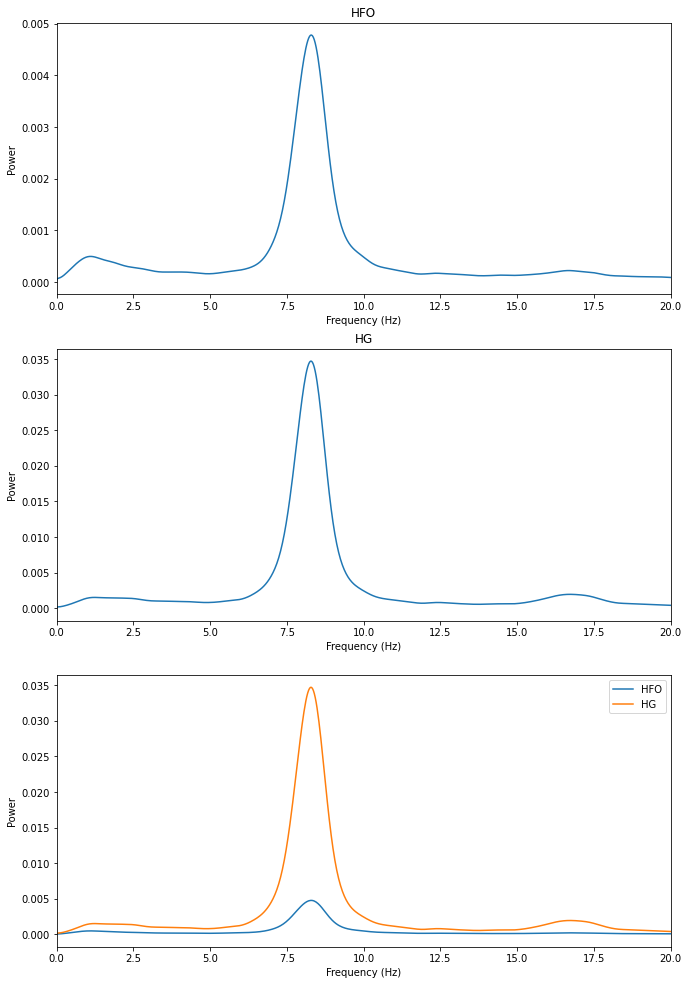

In [ ]:
# Question 8

plt.figure(figsize=(11,17))
plt.subplot(311)
plt.plot(F,PSD_HFO)
plt.xlim([0,20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('HFO')

plt.subplot(312)
plt.plot(F,PSD_HG)
plt.xlim([0,20])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('HG')

plt.subplot(313)
plt.plot(F,PSD_HFO, label = 'HFO')
plt.plot(F,PSD_HG, label = 'HG')
plt.xlim([0,20])
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

plt.show()

In [ ]:
# Question 9
condition = np.transpose([(F>=5) & (F<=10)])

HG_theta = np.mean(PSD_HG[np.where(condition)])
HFO_theta = np.mean(PSD_HFO[np.where(condition)])

print(HG_theta)
print(HFO_theta)

0.0100724633011827
0.0014856369483279737


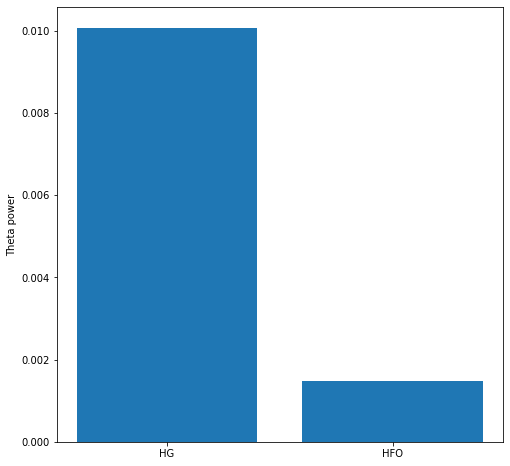

In [53]:
# Question 10

plt.figure(figsize=(8,8))
plt.bar([0, 1],[HG_theta, HFO_theta])
plt.ylabel('Theta power')
plt.xticks([0, 1],['HG', 'HFO'])
plt.show()

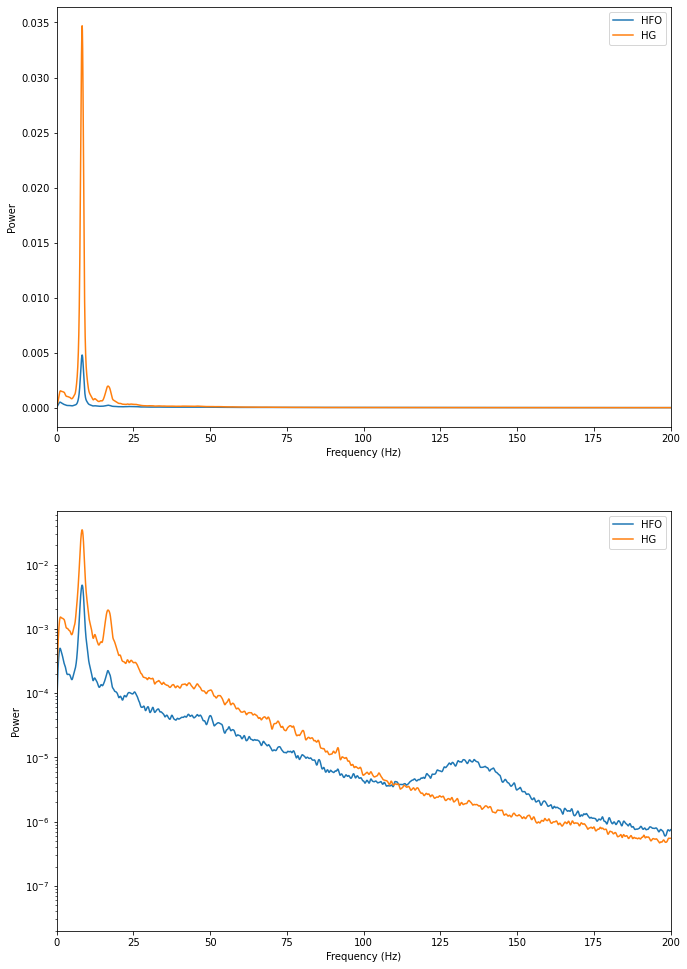

In [ ]:
# Question 11

plt.figure(figsize=(11,17))
plt.subplot(211)
plt.plot(F,PSD_HFO, label = 'HFO')
plt.plot(F,PSD_HG, label = 'HG')
plt.xlim([0,200])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

plt.subplot(212)
plt.plot(F,PSD_HFO, label = 'HFO')
plt.plot(F,PSD_HG, label = 'HG')
plt.xlim([0,200])
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()

plt.show()